1. Import the csv file into a Data Frame.
2. Identify the number of columns and check the size of the dataframe

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('loan.csv',low_memory=False)

df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [2]:
#Understand the shape of the DataFrame
df.shape

(39717, 111)

In [3]:
#Drop the columns with all the null values
nullDroppedDf = df.dropna(axis=1,how='all').dropna(how='all')

Get the list of all existing columns after deleting the columns with null values

In [4]:
import numpy as np
cols = np.array(nullDroppedDf.columns)
cols.sort()
cols

array(['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type',
       'chargeoff_within_12_mths', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'desc',
       'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d',
       'loan_amnt', 'loan_status', 'member_id', 'mths_since_last_delinq',
       'mths_since_last_record', 'next_pymnt_d', 'open_acc', 'out_prncp',
       'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util',
       'sub_grade', 'tax_liens', 'term', 'title', 'total_acc',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
       'total_rec_late_fee', 'total_rec_prncp', 'url',
       'verification_status', 'zip

Get the list of all the columns which have unique values in all its rows

In [5]:
#understand the current shape of the dataframe
nullDroppedDf.shape
#(39717, 57)

#get the count of all the columns which have a unique value in it.
uniquecols = [col for col in np.array(nullDroppedDf.columns) if nullDroppedDf[col].nunique() == 1]
len(uniquecols)

9

In [6]:
# checking the values of the columns which have unique values
nullDroppedDf[uniquecols].head()

pymnt_plan initial_list_status  collections_12_mths_ex_med  policy_code  \
0          n                   f                         0.0            1   
1          n                   f                         0.0            1   
2          n                   f                         0.0            1   
3          n                   f                         0.0            1   
4          n                   f                         0.0            1   

  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
0       INDIVIDUAL               0                       0.0            0   
1       INDIVIDUAL               0                       0.0            0   
2       INDIVIDUAL               0                       0.0            0   
3       INDIVIDUAL               0                       0.0            0   
4       INDIVIDUAL               0                       0.0            0   

   tax_liens  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0

Drop all the values with unique values because they will not provide any additional insights into the data

In [7]:
udf = nullDroppedDf.drop(nullDroppedDf.columns[nullDroppedDf.nunique() == 1].tolist(),axis=1)

We will have to rename all the columns whose names dont provide sufficient information.

In [8]:
new_column_names = {'acc_now_delinq':'num_of_curr_delq_acc',
'collection_recovery_fee':'collection_fee_post_chargeoff',
'collections_12_mths_ex_med':'num_of_coll_in_12_mnths_ex_med',
'delinq_2yrs':'num_of_30plus_del_amt_for_2yrs',
'delinq_amnt':'pastdue_owed_amt_on_delq_acct',
'desc':'loan_desc_by_borrower',
'dti':'debt_to_income_ratio',
'earliest_cr_line':'mnth_earliest_crdt_line_opened',
'emp_length':'emplyment_len_yrs',
'emp_title':'borrower_emplymnt_title',
'funded_amnt_inv':'total_committed_amnt_by_investors',
'grade':'assgnd_loan_grade',
'id':'loan_listing_id',
'initial_list_status':'initial_loan_listing_status',
'inq_last_6mths':'num_inq_past_6mnths',
'installment':'mnthly_installment',
'int_rate':'loan_interest_rate',
'issue_d':'loan_funded_mnth',
'last_credit_pull_d':'mnth_recent_credit_pulled',
'last_pymnt_amnt':'last_total_pymnt_amnt_receivd',
'last_pymnt_d':'last_mnth_was_pymnt_receivd',
'loan_amnt':'curr_apprvd_loan_amnt',
'term':'loan_term_mnths',
'next_pymnt_d':'next_payment_date',
'open_acc':'num_of_open_credit_accnts',
'out_prncp':'outstanding_prinpl_amnt',
'out_prncp_inv':'outstanding_prinpl_investors',
'pub_rec':'num_derogtry_publc_recs',
'pub_rec_bankruptcies':'num_publc_rec_bankruptcies',
'purpose':'loan_purpose',
'revol_util':'revolv_util_rate',
'tax_liens':'num_tax_liens',
'title':'loan_title',
'total_acc':'num_total_curr_acc_lines_',
'total_pymnt':'total_payments_received',
'total_pymnt_inv':'total_payments_received_inv',
'total_rec_int':'total_interest_received',
'total_rec_late_fee':'total_late_fee_received',
'total_rec_prncp':'total_principal_received',
'verification_status':'incm_src_verification_status'
}

In [9]:
#renaming all the columns and making the change permanent
udf = udf.rename(columns=new_column_names)

Univariate analysis of the number of public record bankruptcies column.

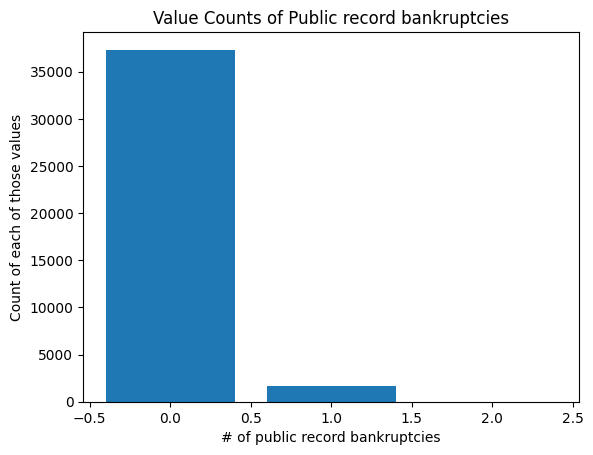

In [10]:
udf.num_publc_rec_bankruptcies.value_counts()

# Calculate the value counts
value_counts = udf['num_publc_rec_bankruptcies'].value_counts()

# Plot the value counts as a bar chart
plt.bar(value_counts.index, value_counts.values)

# Set the labels and title
plt.xlabel('# of public record bankruptcies')
plt.ylabel('Count of each of those values')
plt.title('Value Counts of Public record bankruptcies')

# Display the bar chart
plt.show()



In [11]:
#understanding if the loan applicants are unique
udf.member_id.nunique()

39717

The shape of the dataframe after deleting the columns which are not relevant.
Now delete rows which have a lot of irrelevant values or null values

In [12]:
udf.isna().sum()

loan_listing_id                          0
member_id                                0
curr_apprvd_loan_amnt                    0
funded_amnt                              0
total_committed_amnt_by_investors        0
loan_term_mnths                          0
loan_interest_rate                       0
mnthly_installment                       0
assgnd_loan_grade                        0
sub_grade                                0
borrower_emplymnt_title               2459
emplyment_len_yrs                     1075
home_ownership                           0
annual_inc                               0
incm_src_verification_status             0
loan_funded_mnth                         0
loan_status                              0
url                                      0
loan_desc_by_borrower                12942
loan_purpose                             0
loan_title                              11
zip_code                                 0
addr_state                               0
debt_to_inc

<Axes: xlabel='num_derogtry_publc_recs'>

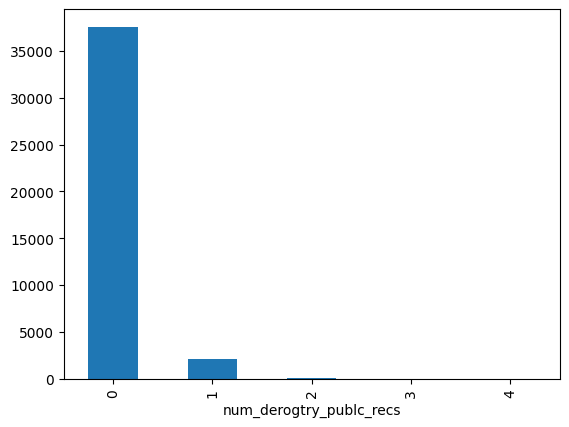

In [13]:
grouped = udf.groupby('num_derogtry_publc_recs')['loan_status'].count()

grouped.plot(kind='bar')

In [14]:
udf.drop(['last_total_pymnt_amnt_receivd','loan_listing_id','last_total_pymnt_amnt_receivd',
          'loan_title','num_publc_rec_bankruptcies','next_payment_date','num_derogtry_publc_recs',
          'loan_funded_mnth','url','member_id'],axis=1,inplace=True)


Final list of columns on which the data analysis needs to be done

In [15]:
print(udf.dtypes)

curr_apprvd_loan_amnt                  int64
funded_amnt                            int64
total_committed_amnt_by_investors    float64
loan_term_mnths                       object
loan_interest_rate                    object
mnthly_installment                   float64
assgnd_loan_grade                     object
sub_grade                             object
borrower_emplymnt_title               object
emplyment_len_yrs                     object
home_ownership                        object
annual_inc                           float64
incm_src_verification_status          object
loan_status                           object
loan_desc_by_borrower                 object
loan_purpose                          object
zip_code                              object
addr_state                            object
debt_to_income_ratio                 float64
num_of_30plus_del_amt_for_2yrs         int64
mnth_earliest_crdt_line_opened        object
num_inq_past_6mnths                    int64
mths_since

In [16]:
#converting date values to datetime so that comparisons, creating derived columns becomes easier.
udf.mnth_earliest_crdt_line_opened = pd.to_datetime(udf.mnth_earliest_crdt_line_opened,format='%b-%y')
udf.mnth_recent_credit_pulled = pd.to_datetime(udf.mnth_recent_credit_pulled,format='%b-%y')
udf.last_mnth_was_pymnt_receivd = pd.to_datetime(udf.last_mnth_was_pymnt_receivd,format='%b-%y')

In [17]:
import re

#udf.dtypes
udf.emplyment_len_yrs = udf['emplyment_len_yrs'].astype(str).apply(lambda x: re.findall(r'\d+\.?\d*', x)[0] if re.findall(r'\d+\.?\d*', x) else None)
#converting int values to int by removing alpha numeric characters.
udf.loan_term_mnths = udf.loan_term_mnths.str.replace(' months','')
udf.loan_interest_rate = udf.loan_interest_rate.str.replace('%','')
udf.revolv_util_rate = udf.revolv_util_rate.str.replace('%','')

In [18]:
#converting them to relevant types
udf.loan_term_mnths = udf.loan_term_mnths.astype(int)
udf.loan_interest_rate = udf.loan_interest_rate.astype(float)
udf.revolv_util_rate = udf.revolv_util_rate.astype(float)

In [19]:
# most of the deliquent number of months have been for 0 months
counts = udf.num_of_30plus_del_amt_for_2yrs.value_counts()
#plt.bar(counts.index,counts.values/sum(counts.values))
udf.num_of_30plus_del_amt_for_2yrs.value_counts()

num_of_30plus_del_amt_for_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

In [20]:
udf.isna().sum()

curr_apprvd_loan_amnt                    0
funded_amnt                              0
total_committed_amnt_by_investors        0
loan_term_mnths                          0
loan_interest_rate                       0
mnthly_installment                       0
assgnd_loan_grade                        0
sub_grade                                0
borrower_emplymnt_title               2459
emplyment_len_yrs                     1075
home_ownership                           0
annual_inc                               0
incm_src_verification_status             0
loan_status                              0
loan_desc_by_borrower                12942
loan_purpose                             0
zip_code                                 0
addr_state                               0
debt_to_income_ratio                     0
num_of_30plus_del_amt_for_2yrs           0
mnth_earliest_crdt_line_opened           0
num_inq_past_6mnths                      0
mths_since_last_delinq               25682
mths_since_

In [21]:
udf[udf['loan_status'] == 'Charged Off'].mths_since_last_delinq.value_counts()

#udf[udf['loan_status'] == 'Charged Off'].mths_since_last_delinq.describe()

mths_since_last_delinq
0.0      67
19.0     52
15.0     46
21.0     40
25.0     38
         ..
64.0     11
1.0       6
83.0      2
107.0     1
97.0      1
Name: count, Length: 86, dtype: int64

<Axes: xlabel='mths_since_last_record'>

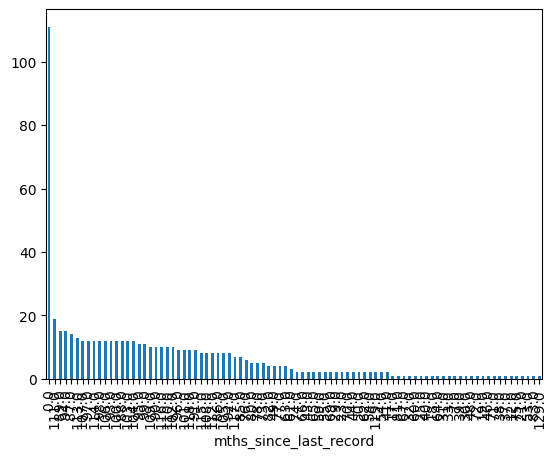

In [22]:
counts = udf[udf['loan_status'] == 'Charged Off'].mths_since_last_record.value_counts()

counts.plot(kind='bar')

In [23]:
udf.drop(['mths_since_last_record','mths_since_last_delinq','loan_desc_by_borrower'],axis=1,inplace=True)

In [24]:
udf.dtypes

curr_apprvd_loan_amnt                         int64
funded_amnt                                   int64
total_committed_amnt_by_investors           float64
loan_term_mnths                               int64
loan_interest_rate                          float64
mnthly_installment                          float64
assgnd_loan_grade                            object
sub_grade                                    object
borrower_emplymnt_title                      object
emplyment_len_yrs                            object
home_ownership                               object
annual_inc                                  float64
incm_src_verification_status                 object
loan_status                                  object
loan_purpose                                 object
zip_code                                     object
addr_state                                   object
debt_to_income_ratio                        float64
num_of_30plus_del_amt_for_2yrs                int64
mnth_earlies

<Axes: xlabel='num_of_30plus_del_amt_for_2yrs'>

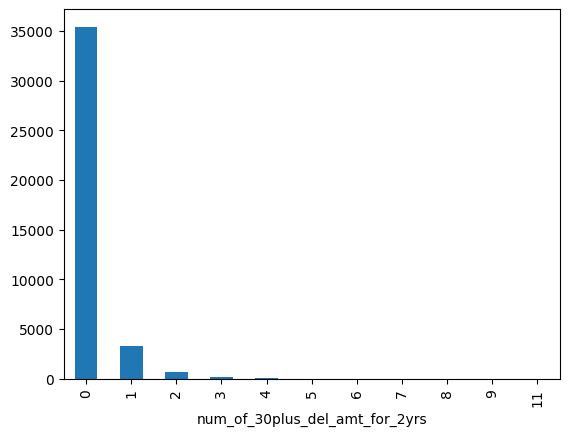

In [25]:
# most of the deliquent number of months have been for 0 months
counts = udf.num_of_30plus_del_amt_for_2yrs.value_counts()
counts.plot(kind='bar')
#plt.bar(counts.index,counts.values/sum(counts.values))
#udf.num_of_30plus_del_amt_for_2yrs.value_counts()

In [26]:
udf.shape

(39717, 36)

In [27]:
#understanding the data in the approved loan amount
udf.curr_apprvd_loan_amnt.describe().round(1)

count    39717.0
mean     11219.4
std       7456.7
min        500.0
25%       5500.0
50%      10000.0
75%      15000.0
max      35000.0
Name: curr_apprvd_loan_amnt, dtype: float64

In [28]:
# The correlation between Dti and number of 30plus days deliquent amt for 2 years is neutral
udf['debt_to_income_ratio'].corr(udf['num_of_30plus_del_amt_for_2yrs'])

-0.0344515578834911

In [29]:
# there are 3 types of verification and understanding how the values have an effect on the charged off accounts
udf['incm_src_verification_status'].value_counts()


incm_src_verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

<BarContainer object of 3 artists>

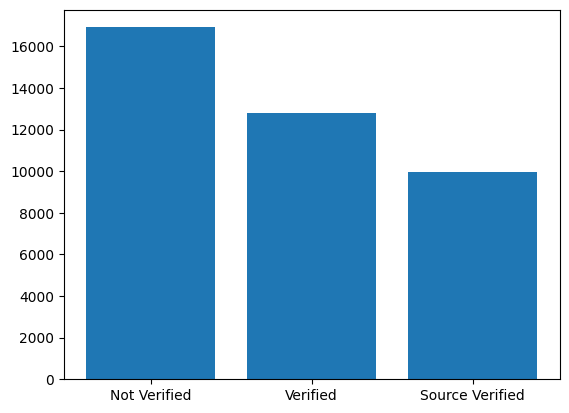

In [30]:
#Understanding how many are verified and not verified sources.

#plt.bar(chrgdOffLoandf['incm_src_verification_status'].value_counts().index,chrgdOffLoandf['incm_src_verification_status'].value_counts().count)
counted = udf['incm_src_verification_status'].value_counts()
plt.bar(counted.index,counted.values)

In [31]:
#checking the values of sub grade and grade
udf.sub_grade.value_counts()

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64

Checking the influence of grade on the interest rates.

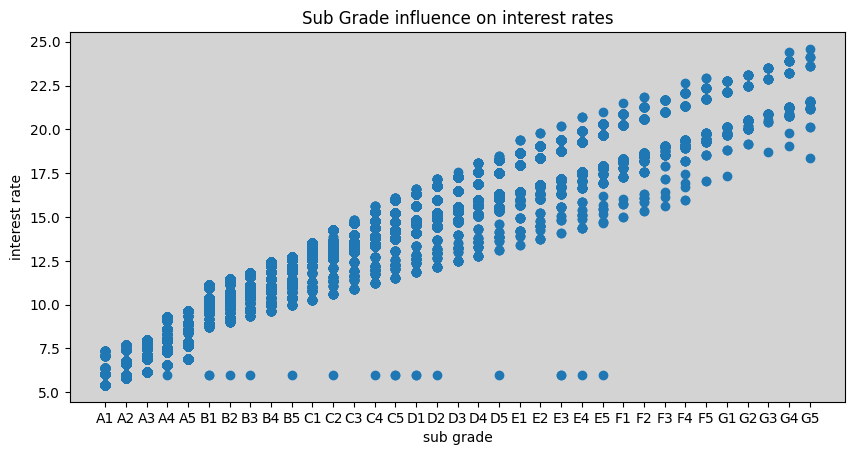

In [32]:

sorted_data = sorted(zip(udf['sub_grade'], udf['loan_interest_rate']))
sorted_x, sorted_y = zip(*sorted_data)

# Create the Figure and Axes objects
fig, ax = plt.subplots()
fig.set_figwidth(10)

# Create the scatter plot
ax.scatter(sorted_x, sorted_y)

# Customize the chart
ax.set_title('Sub Grade influence on interest rates')
ax.set_xlabel('sub grade')
ax.set_ylabel('interest rate')
ax.set_facecolor('lightgray')

# Show the chart
plt.show()


Fully Paid     32950
Charged Off     5627
Current         1140

Marking the loan_status to values so that it can be used for visualization
1. Charged Off is mapped to -1
2. Current is mapped to 0
3. Fully Paid is mapped to 1

In [33]:

udf.assgnd_loan_grade.value_counts()
def mapValues(x):
    if (x == 'Charged Off'):
        return -1
    if (x == 'Fully Paid'):
        return 1
    if (x == 'Current'):
        return 0
udf['loan_status_value'] = udf['loan_status'].apply(mapValues)


Understanding the impact of loan_grade, income source verification status on loan status.

In [34]:
pd.pivot_table(udf,values='loan_status_value',index='assgnd_loan_grade',
               columns=['incm_src_verification_status','loan_status'],
               aggfunc=lambda x: (len(x)/len(udf)) * 100).round(1)

incm_src_verification_status Not Verified                    Source Verified  \
loan_status                   Charged Off Current Fully Paid     Charged Off   
assgnd_loan_grade                                                              
A                                     0.8     0.1       12.2             0.4   
B                                     1.6     0.2       11.9             0.9   
C                                     1.5     0.2        7.2             0.8   
D                                     1.0     0.1        3.8             0.8   
E                                     0.4     0.0        1.2             0.5   
F                                     0.1     0.0        0.3             0.2   
G                                     0.0     0.0        0.1             0.1   

incm_src_verification_status                       Verified                     
loan_status                  Current Fully Paid Charged Off Current Fully Paid  
assgnd_loan_grade                                                               
A                                0.0        6.0         0.4     0.0        5.5  
B                                0.2        6.3         1.1     0.5        7.6  
C                                0.2        4.0         1.1     0.3        5.1  
D                                0.2        2.5         1.0     0.3        3.7  
E                                0.1        1.3         0.9     0.3        2.4  
F                                0.0        0.5         0.5     0.1        0.9  
G                                0.0        0.1         0.1     0.0        0.3

In [35]:
udf.debt_to_income_ratio.describe().round(1)

count    39717.0
mean        13.3
std          6.7
min          0.0
25%          8.2
50%         13.4
75%         18.6
max         30.0
Name: debt_to_income_ratio, dtype: float64

Create a new dataframe to only work on the data for 'Charged Off' loan status.

In [36]:
udf1 = udf[udf['loan_status_value'] == -1].copy()

Convert the debt to income ratio into 5 buckets and understand the relationship with the delinquent accounts.

<Axes: xlabel='dti_label'>

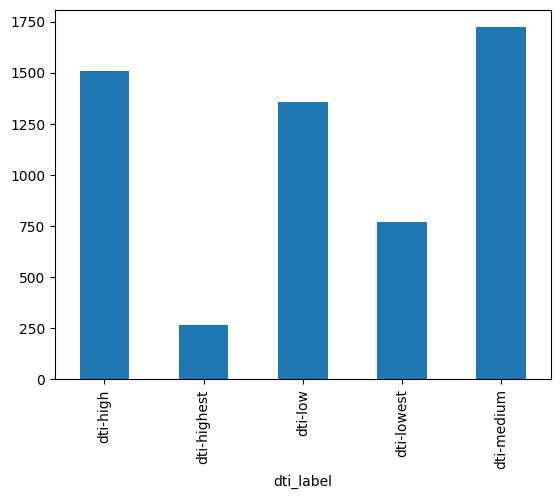

In [37]:
def get_dti_label(number):
    if number < 0 or number > 30:
        raise ValueError("Number should be between 500 and 35000.")

    bin_width = (30) / 5  # Calculate the width of each bin
    bin_labels = ['dti-lowest', 'dti-low', 'dti-medium', 'dti-high', 'dti-highest']  # Labels for the bins
    bin_start = 0  # Starting point of the first bin
    
    # Calculate the bin index
    bin_index = int((number - bin_start) // bin_width)
    
    # Return the corresponding bin label
    return bin_labels[bin_index]

udf1['dti_label'] = udf1['debt_to_income_ratio'].apply(get_dti_label)
grpd_lnstatus = udf1.groupby(by='dti_label')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

In [38]:
udf1.loan_status_value.value_counts()

loan_status_value
-1    5627
Name: count, dtype: int64

Seggregate the loan values given to the customers into 5 buckets and understand which bucket is contributing more to the 'charged off' loan account status

<Axes: xlabel='apprvd_loan_amount_label'>

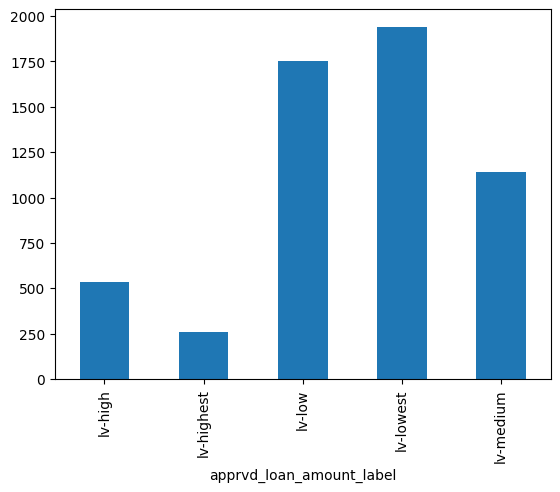

In [39]:
def get_bin_label(number):
    if number < 499 or number > 35001:
        raise ValueError("Number should be between 500 and 35000.")

    bin_width = (35001 - 499) / 5  # Calculate the width of each bin
    bin_labels = ['lv-lowest', 'lv-low', 'lv-medium', 'lv-high', 'lv-highest']  # Labels for the bins
    bin_start = 500  # Starting point of the first bin
    
    # Calculate the bin index
    bin_index = int((number - bin_start) // bin_width)
    
    # Return the corresponding bin label
    return bin_labels[bin_index]

udf1['apprvd_loan_amount_label'] = udf1['curr_apprvd_loan_amnt'].apply(lambda x: get_bin_label(x))

grpd_lnstatus = udf1.groupby(by='apprvd_loan_amount_label')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

Understanding the home ownership category which has the highest contribution towards charged off loan accounts

<Axes: xlabel='home_ownership'>

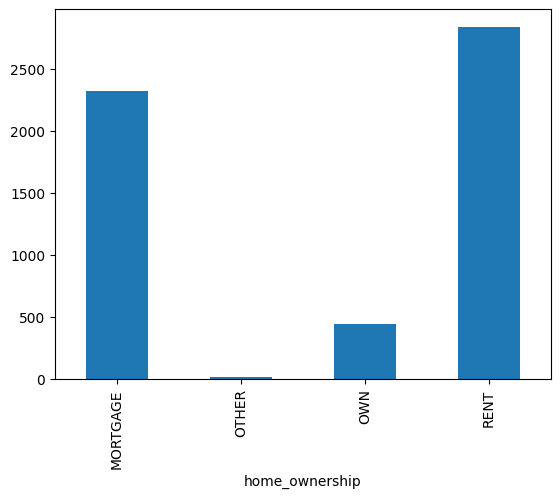

In [40]:
grpd_lnstatus = udf1.groupby(by='home_ownership')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

Understanding the loan term period if it has an impact on the loan status 'Charged Off'

<Axes: xlabel='loan_term_mnths'>

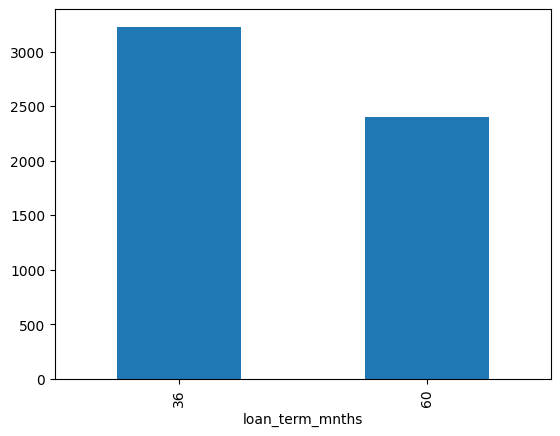

In [41]:
grpd_lnstatus = udf1.groupby(by='loan_term_mnths')['loan_status_value'].count()
grpd_lnstatus.plot(kind='bar')

Understanding the relationship between the number of 30plus days deliquency for the last 2 years and Charged off value.

In [42]:

pd.pivot_table(udf1,values='loan_status_value',index='num_of_30plus_del_amt_for_2yrs',
               columns='loan_status',aggfunc=lambda x: (len(x)/len(udf) *100)).round(1)

loan_status                     Charged Off
num_of_30plus_del_amt_for_2yrs             
0                                      12.4
1                                       1.3
2                                       0.3
3                                       0.1
4                                       0.0
5                                       0.0
6                                       0.0
7                                       0.0
8                                       0.0

Relationship between Borrower employment title and their weightage

In [43]:
udf1.borrower_emplymnt_title.value_counts()


borrower_emplymnt_title
Bank of America              20
US Army                      18
Walmart                      14
UPS                          12
AT&T                         12
                             ..
U of D Jesuit High School     1
EEOC                          1
Life Ambulance                1
R. Young Enterprise, Inc.     1
Auto motors of miami          1
Name: count, Length: 4636, dtype: int64

Relationship between loan purpose and loan status == 'Charged Off'

loan_purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: loan_status, dtype: int64

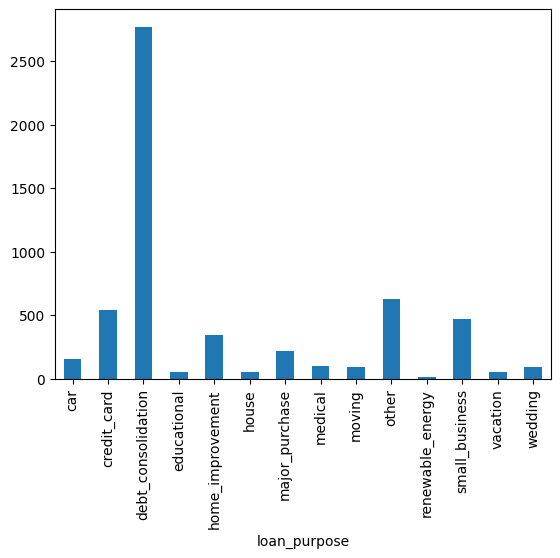

In [44]:
grpd_lnstatus = udf1.groupby(by='loan_purpose')['loan_status'].count()
grpd_lnstatus.plot(kind='bar')
grpd_lnstatus


#plt.xlabel('loan_purpose')
#plt.ylabel('Count')

Getting a detailed range of values for each loan purpose and the number of credits opened for each category

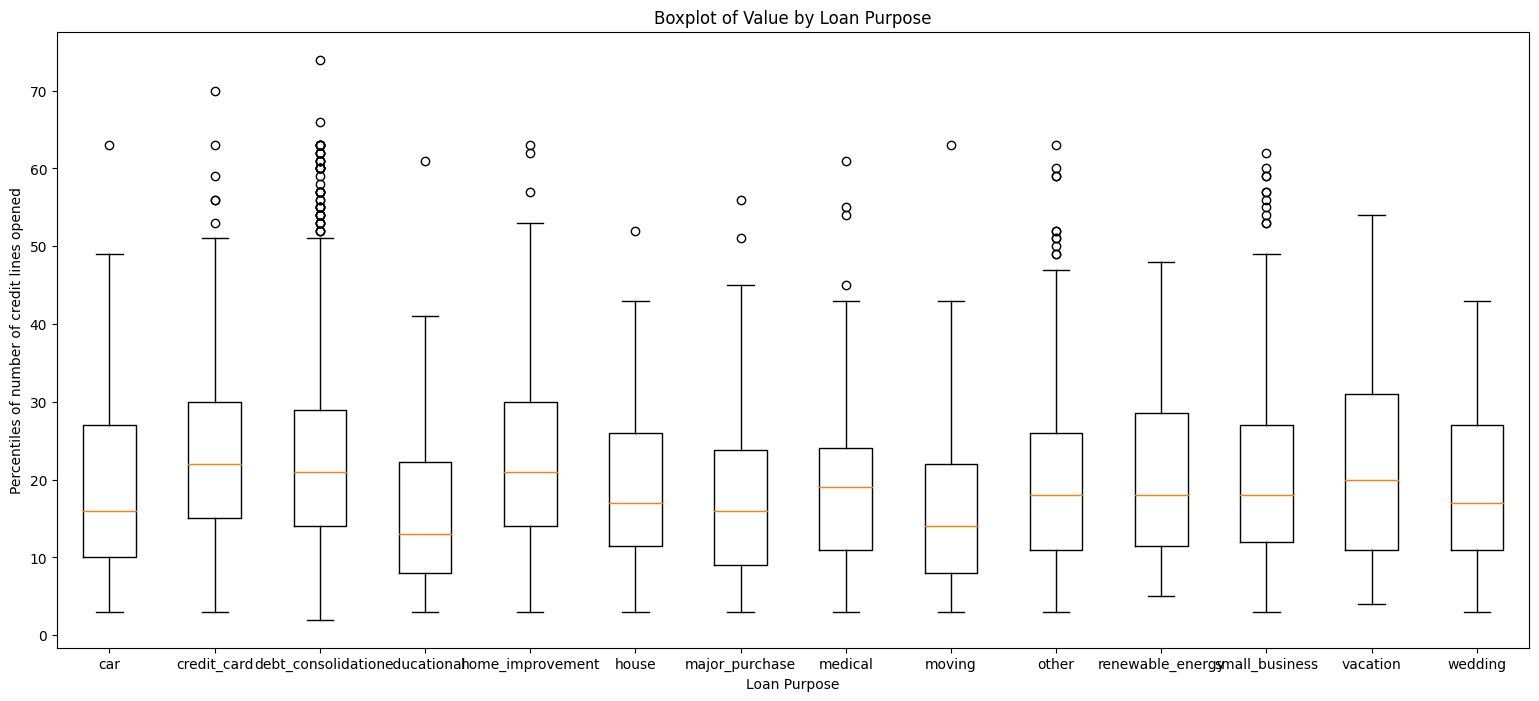

In [45]:
# Group by 'Category' column and create a boxplot of 'Value' column
grouped = udf1.groupby('loan_purpose')
boxplot_data = [group[1]['num_total_curr_acc_lines_'] for group in grouped]
categories = [group[0] for group in grouped]

plt.figure(figsize=(19,8))
# Create the boxplot
plt.boxplot(boxplot_data)

# Set labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Percentiles of number of credit lines opened')
plt.title('Boxplot of Value by Loan Purpose')
plt.xticks(range(1, len(categories) + 1), categories)

# Display the chart
plt.show()


Number of credit lines opened for each of the loan status values

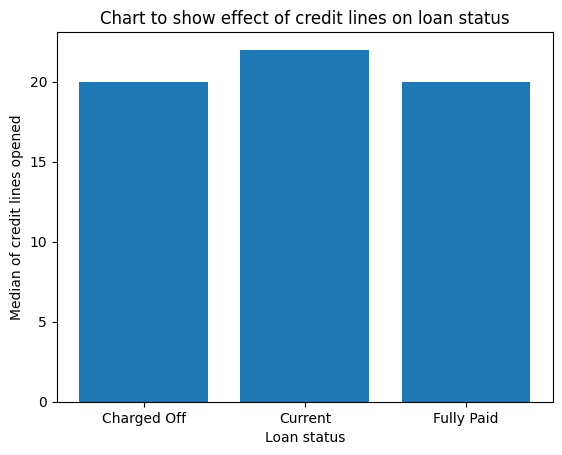

In [46]:


# Group by 'Category' column and collect values in 'Value' column
grouped = udf.groupby('loan_status')['num_total_curr_acc_lines_'].apply(list)

# Create a scatter bar chart
x = np.arange(len(grouped))
y = [np.median(values) for values in grouped.values]

plt.bar(x, y)

# Set x-axis tick labels to the categories
plt.xticks(x, grouped.index)

# Set labels and title
plt.xlabel('Loan status')
plt.ylabel('Median of credit lines opened')
plt.title('Chart to show effect of credit lines on loan status')

# Display the chart
plt.show()


In [47]:
udf1.emplyment_len_yrs.value_counts()
pd.pivot_table(udf1,index= 'emplyment_len_yrs',columns='loan_status',values='loan_status_value',aggfunc='count')

loan_status        Charged Off
emplyment_len_yrs             
1                         1095
10                        1331
2                          567
3                          555
4                          462
5                          458
6                          307
7                          263
8                          203
9                          158

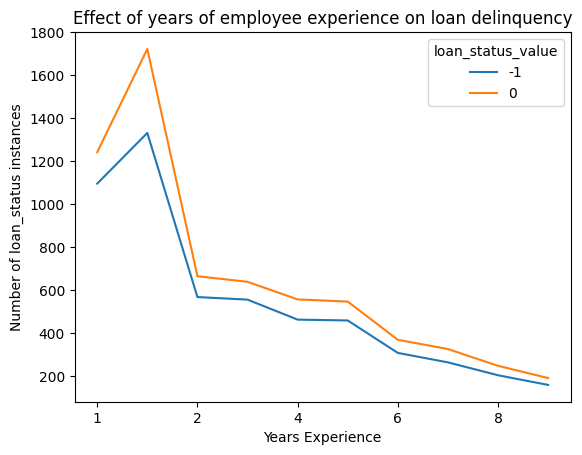

In [48]:
# Group the data by 'Number' and 'Letter', and count the occurrences
grouped = udf[udf['loan_status_value'] != 1].groupby(['emplyment_len_yrs', 'loan_status_value']).size().unstack()

# Plot the stacked line diagram
grouped.plot(kind='line', stacked=True)

# Set labels and title
plt.xlabel('Years Experience')
plt.ylabel('Number of loan_status instances')
plt.title('Effect of years of employee experience on loan delinquency')

# Display the diagram
plt.show()


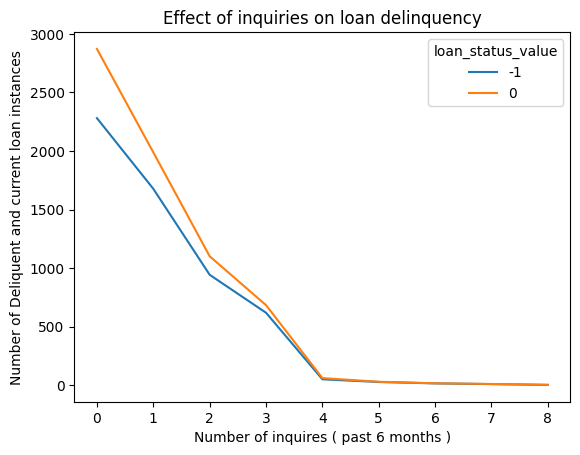

In [49]:


grouped = udf[udf['loan_status_value'] != 1].groupby(['num_inq_past_6mnths', 'loan_status_value']).size().unstack()

# Plot the stacked line diagram
grouped.plot(kind='line', stacked=True)

# Set labels and title
plt.xlabel('Number of inquires ( past 6 months )')
plt.ylabel('Number of Deliquent and current loan instances')
plt.title('Effect of inquiries on loan delinquency')

# Display the diagram
plt.show()

Text(0.5, 1.0, 'Loan Purpose vs Year Experience')

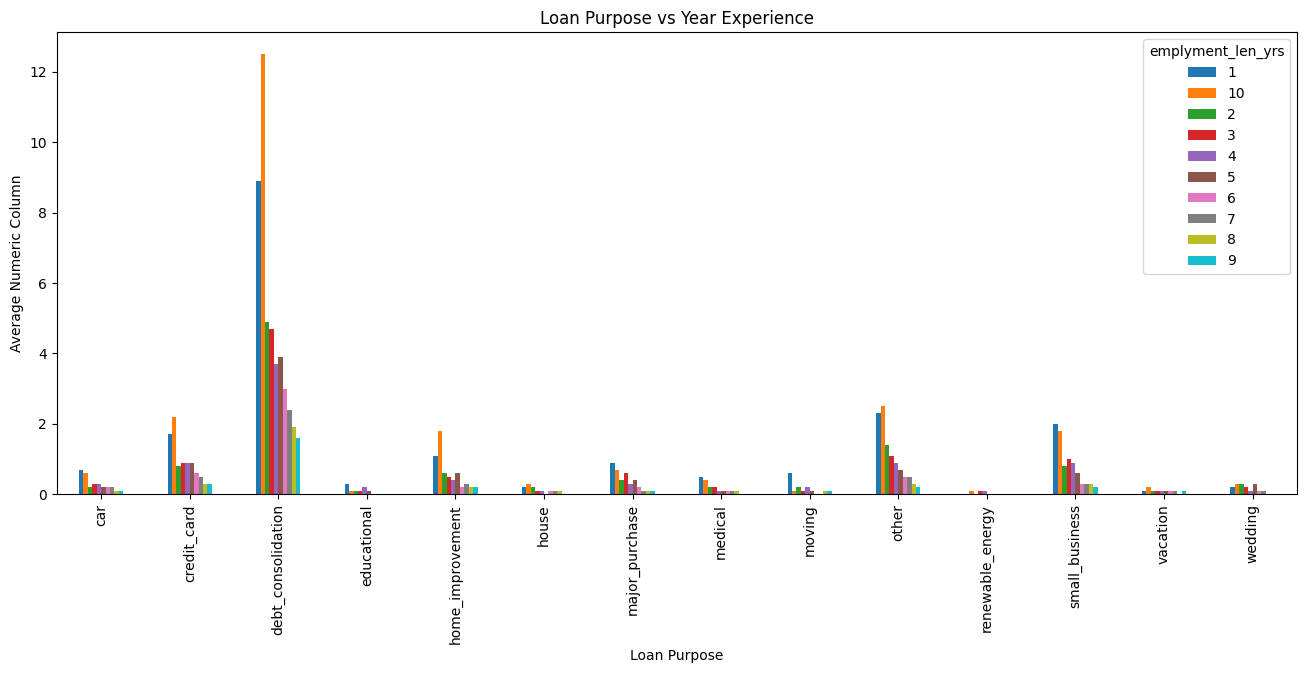

In [50]:

pvtTable = pd.pivot_table(udf1,index = 'loan_purpose',columns=['emplyment_len_yrs'],values='loan_status_value',aggfunc=lambda x: (len(x)/len(udf1) * 100)).round(1)

pvtTable.plot(kind='bar', figsize=(16, 6))

# Set the labels and title
plt.xlabel('Loan Purpose')
plt.ylabel('Average Numeric Column')
plt.title('Loan Purpose vs Year Experience')

Text(0.5, 1.0, 'The last month of payment and its count')

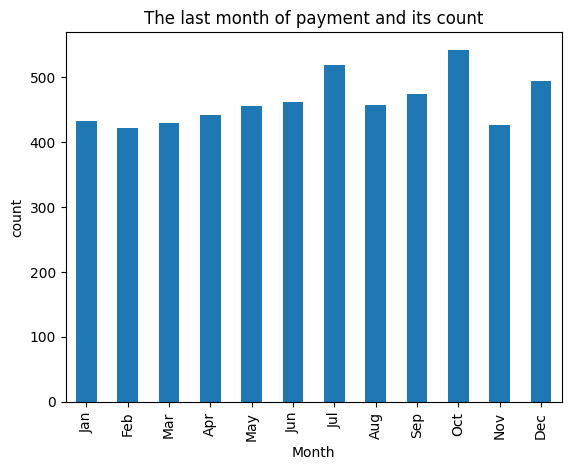

In [51]:
udf1['month_pymt_rcvd'] = udf1['last_mnth_was_pymnt_receivd'].dt.strftime('%b')
# Define the custom sort order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to categorical type with the defined sort order
udf1['month_pymt_rcvd'] = pd.Categorical(udf1['month_pymt_rcvd'], categories=month_order, ordered=True)

udf1.month_pymt_rcvd.value_counts().sort_index().plot.bar()

plt.xlabel('Month')
plt.ylabel('count')

plt.title('The last month of payment and its count')

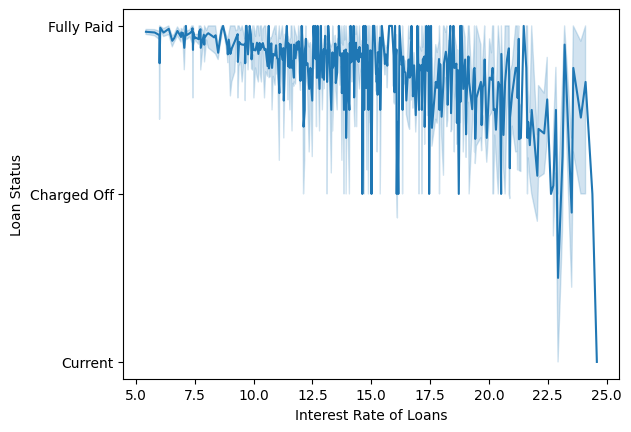

In [58]:
sns.lineplot(x='loan_interest_rate',y='loan_status',data=udf)
plt.xlabel('Interest Rate of Loans')
plt.ylabel('Loan Status')
plt.show()

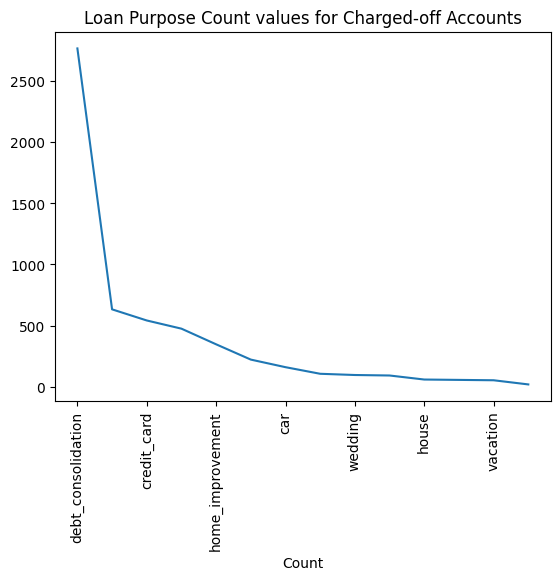

In [ ]:
count_values = udf1.loan_purpose.value_counts()
count_values.plot(kind='line')
plt.xticks(rotation=90)
plt.xlabel('Loan Purpose')
plt.xlabel('Count')
plt.title('Loan Purpose Count values for Charged-off Accounts')
plt.show()

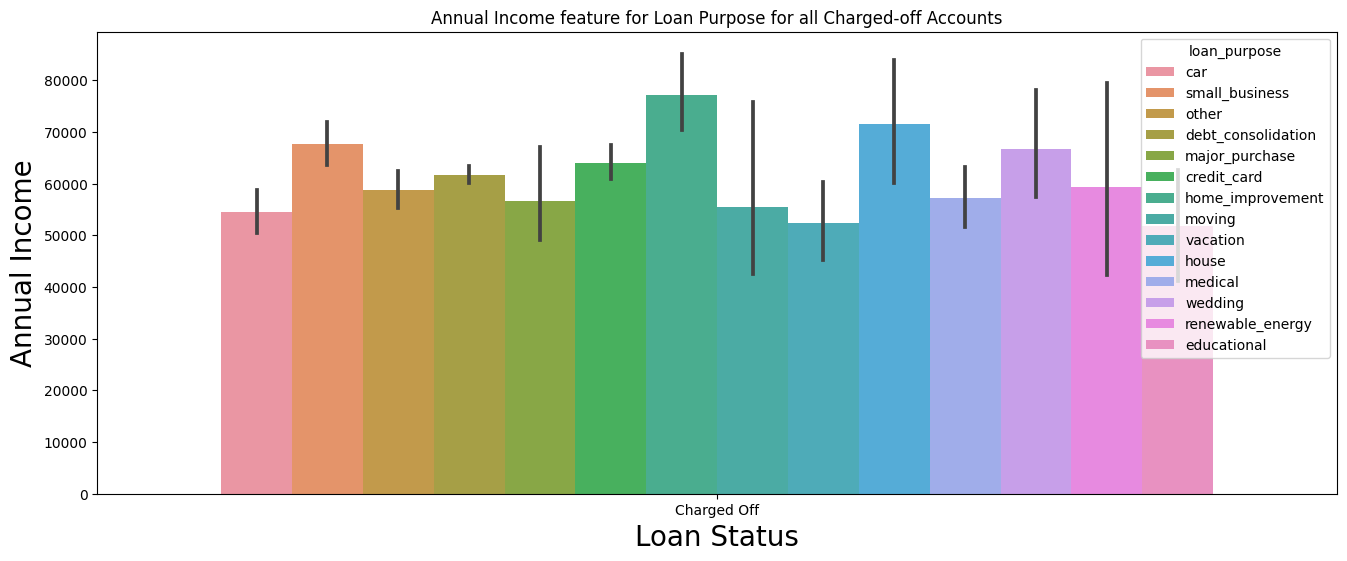

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(y='annual_inc', x='loan_status', hue='loan_purpose', data=udf1)
plt.title("Annual Income feature for Loan Purpose for all Charged-off Accounts")
plt.ylabel('Annual Income',fontsize = 20)
plt.xlabel("Loan Status",fontsize = 20)
plt.show()

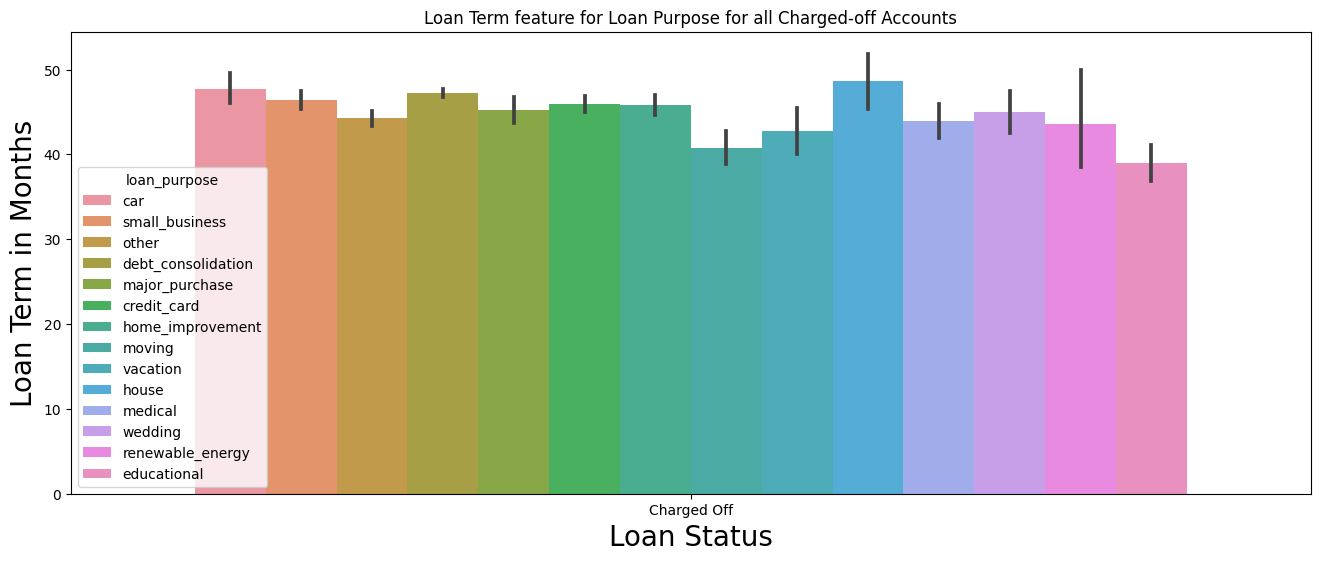

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(y='loan_term_mnths', x='loan_status', hue='loan_purpose', data=udf1)
plt.title("Loan Term feature for Loan Purpose for all Charged-off Accounts")
plt.ylabel('Loan Term in Months', fontsize=20)
plt.xlabel("Loan Status", fontsize=20)
plt.show()

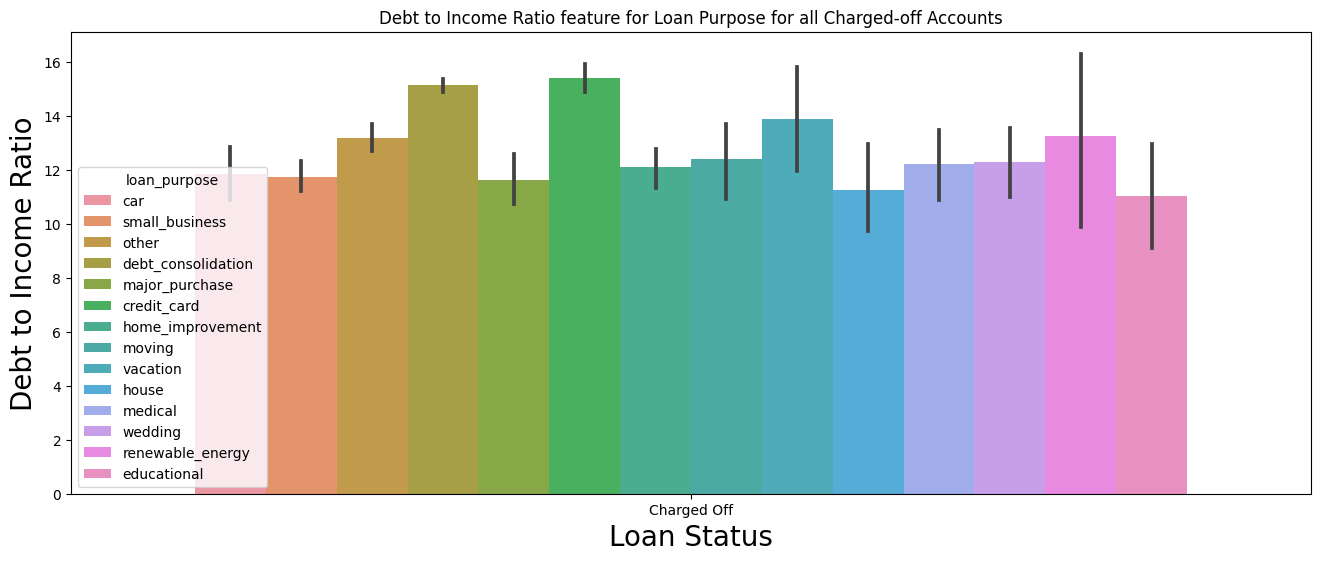

In [ ]:
plt.figure(figsize=(16,6))
sns.barplot(y='debt_to_income_ratio', x='loan_status', hue='loan_purpose', data=udf1)
plt.title("Debt to Income Ratio feature for Loan Purpose for all Charged-off Accounts")
plt.ylabel('Debt to Income Ratio', fontsize=20)
plt.xlabel("Loan Status", fontsize=20)
plt.show()

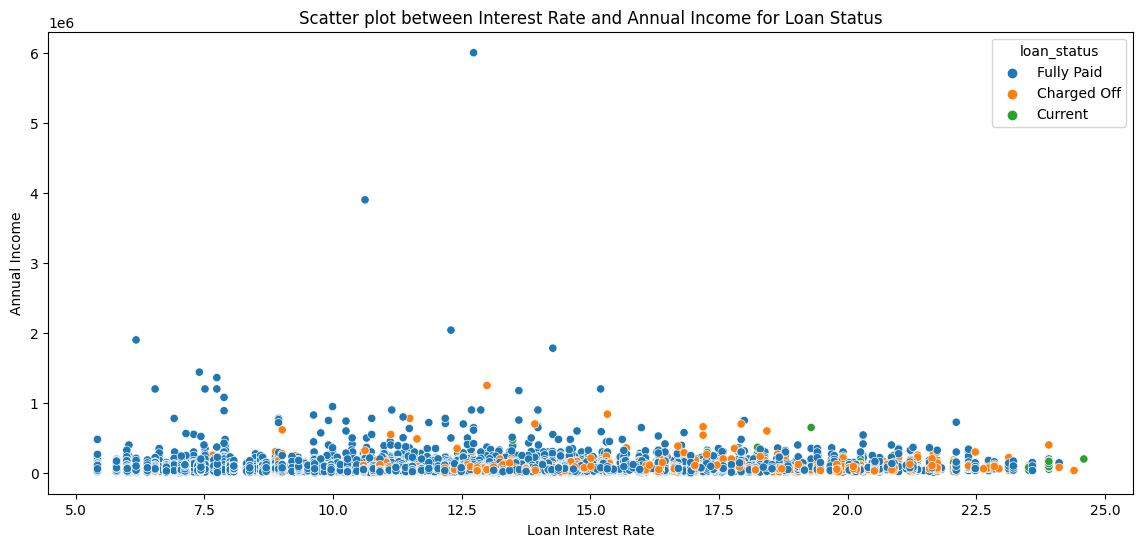

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='loan_interest_rate', y='annual_inc', hue="loan_status", data=udf)
plt.title("Scatter plot between Interest Rate and Annual Income for Loan Status")
plt.xlabel("Loan Interest Rate")
plt.ylabel("Annual Income")
plt.show()

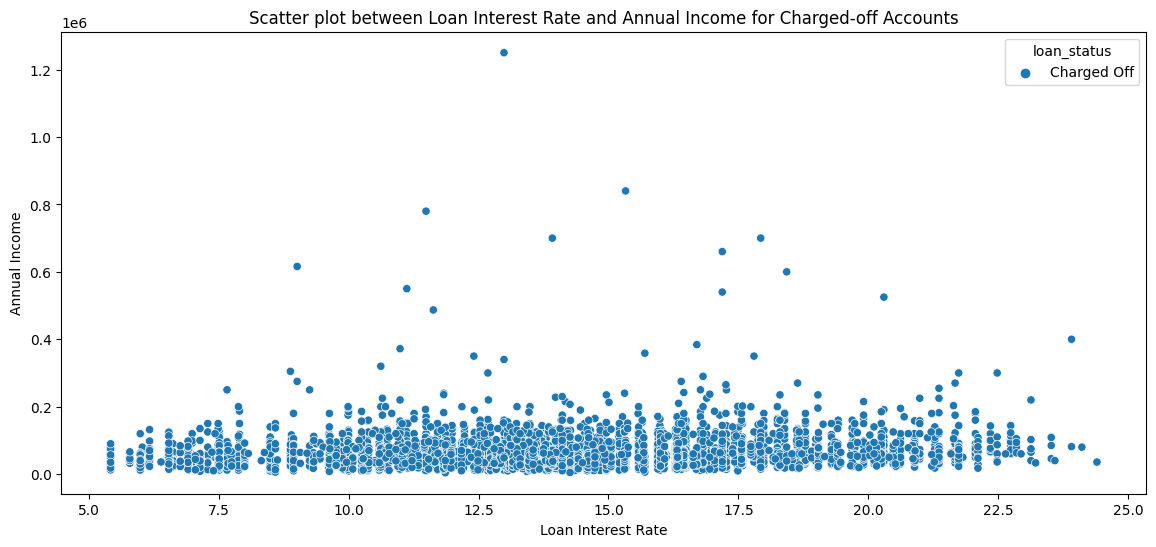

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(x="loan_interest_rate", y="annual_inc", hue="loan_status", data=udf1)
plt.title("Scatter plot between Loan Interest Rate and Annual Income for Charged-off Accounts")
plt.xlabel('Loan Interest Rate')
plt.ylabel('Annual Income')
plt.show()

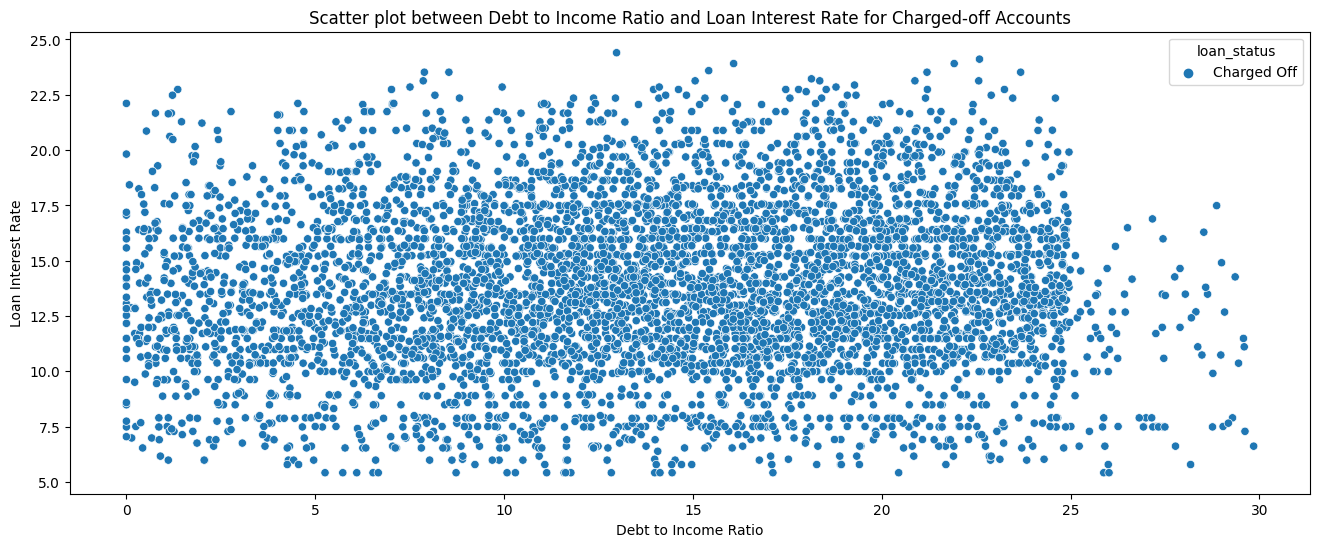

In [ ]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='debt_to_income_ratio', y='loan_interest_rate', hue="loan_status", data=udf1)
plt.title("Scatter plot between Debt to Income Ratio and Loan Interest Rate for Charged-off Accounts")
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Loan Interest Rate')
plt.show()

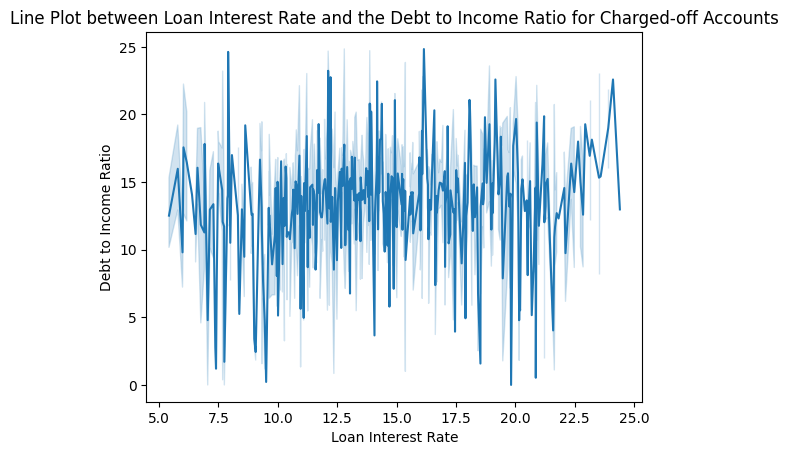

In [ ]:
sns.lineplot(data=udf1, y='debt_to_income_ratio',x='loan_interest_rate')
plt.xlabel('Loan Interest Rate')
plt.ylabel('Debt to Income Ratio')
plt.title('Line Plot between Loan Interest Rate and the Debt to Income Ratio for Charged-off Accounts')
plt.show()

Understanding the relationship between all the variables with accounts which are risky through a heatmap

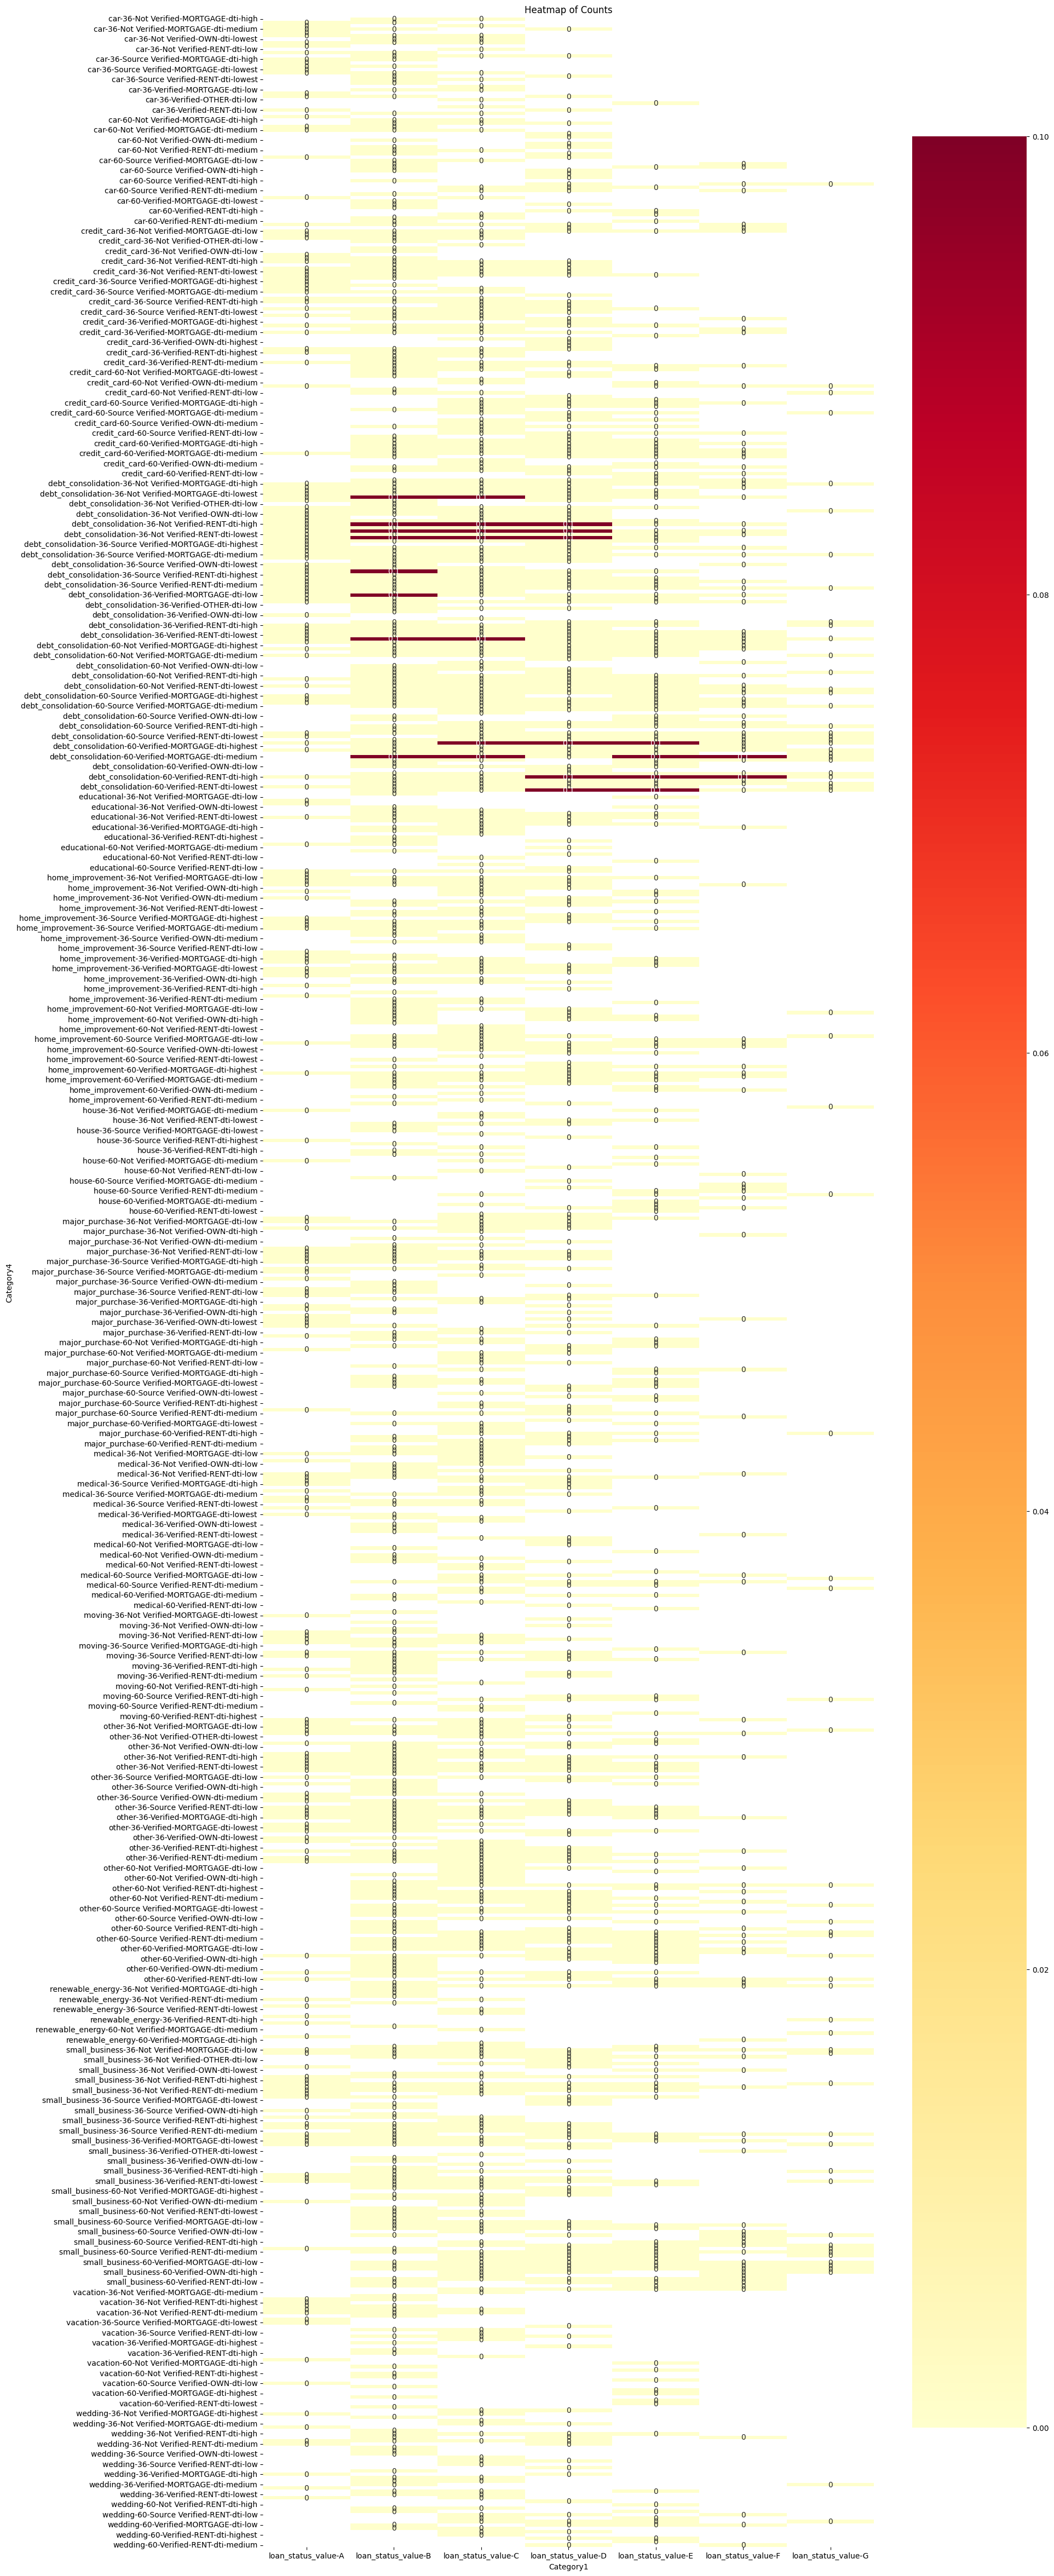

In [53]:

# Create a pivot table with counts
pivot_table = pd.pivot_table(udf1, values='loan_status_value', index=['assgnd_loan_grade','loan_purpose', 'loan_term_mnths','incm_src_verification_status', 'home_ownership','dti_label'],
                             aggfunc=lambda x: len(x)/len(udf) * 100)

# Reshape the pivot table for heatmap
heatmap_data = pivot_table.unstack(level='assgnd_loan_grade')

heatmap_data = np.round(heatmap_data, decimals=1)


# Create a heatmap using seaborn
plt.figure(figsize=(18, 60))  # Set the figure size
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')

# Set the labels and title
plt.xlabel('Category1')
plt.ylabel('Category4')
plt.title('Heatmap of Counts')

# Display the heatmap
plt.show()

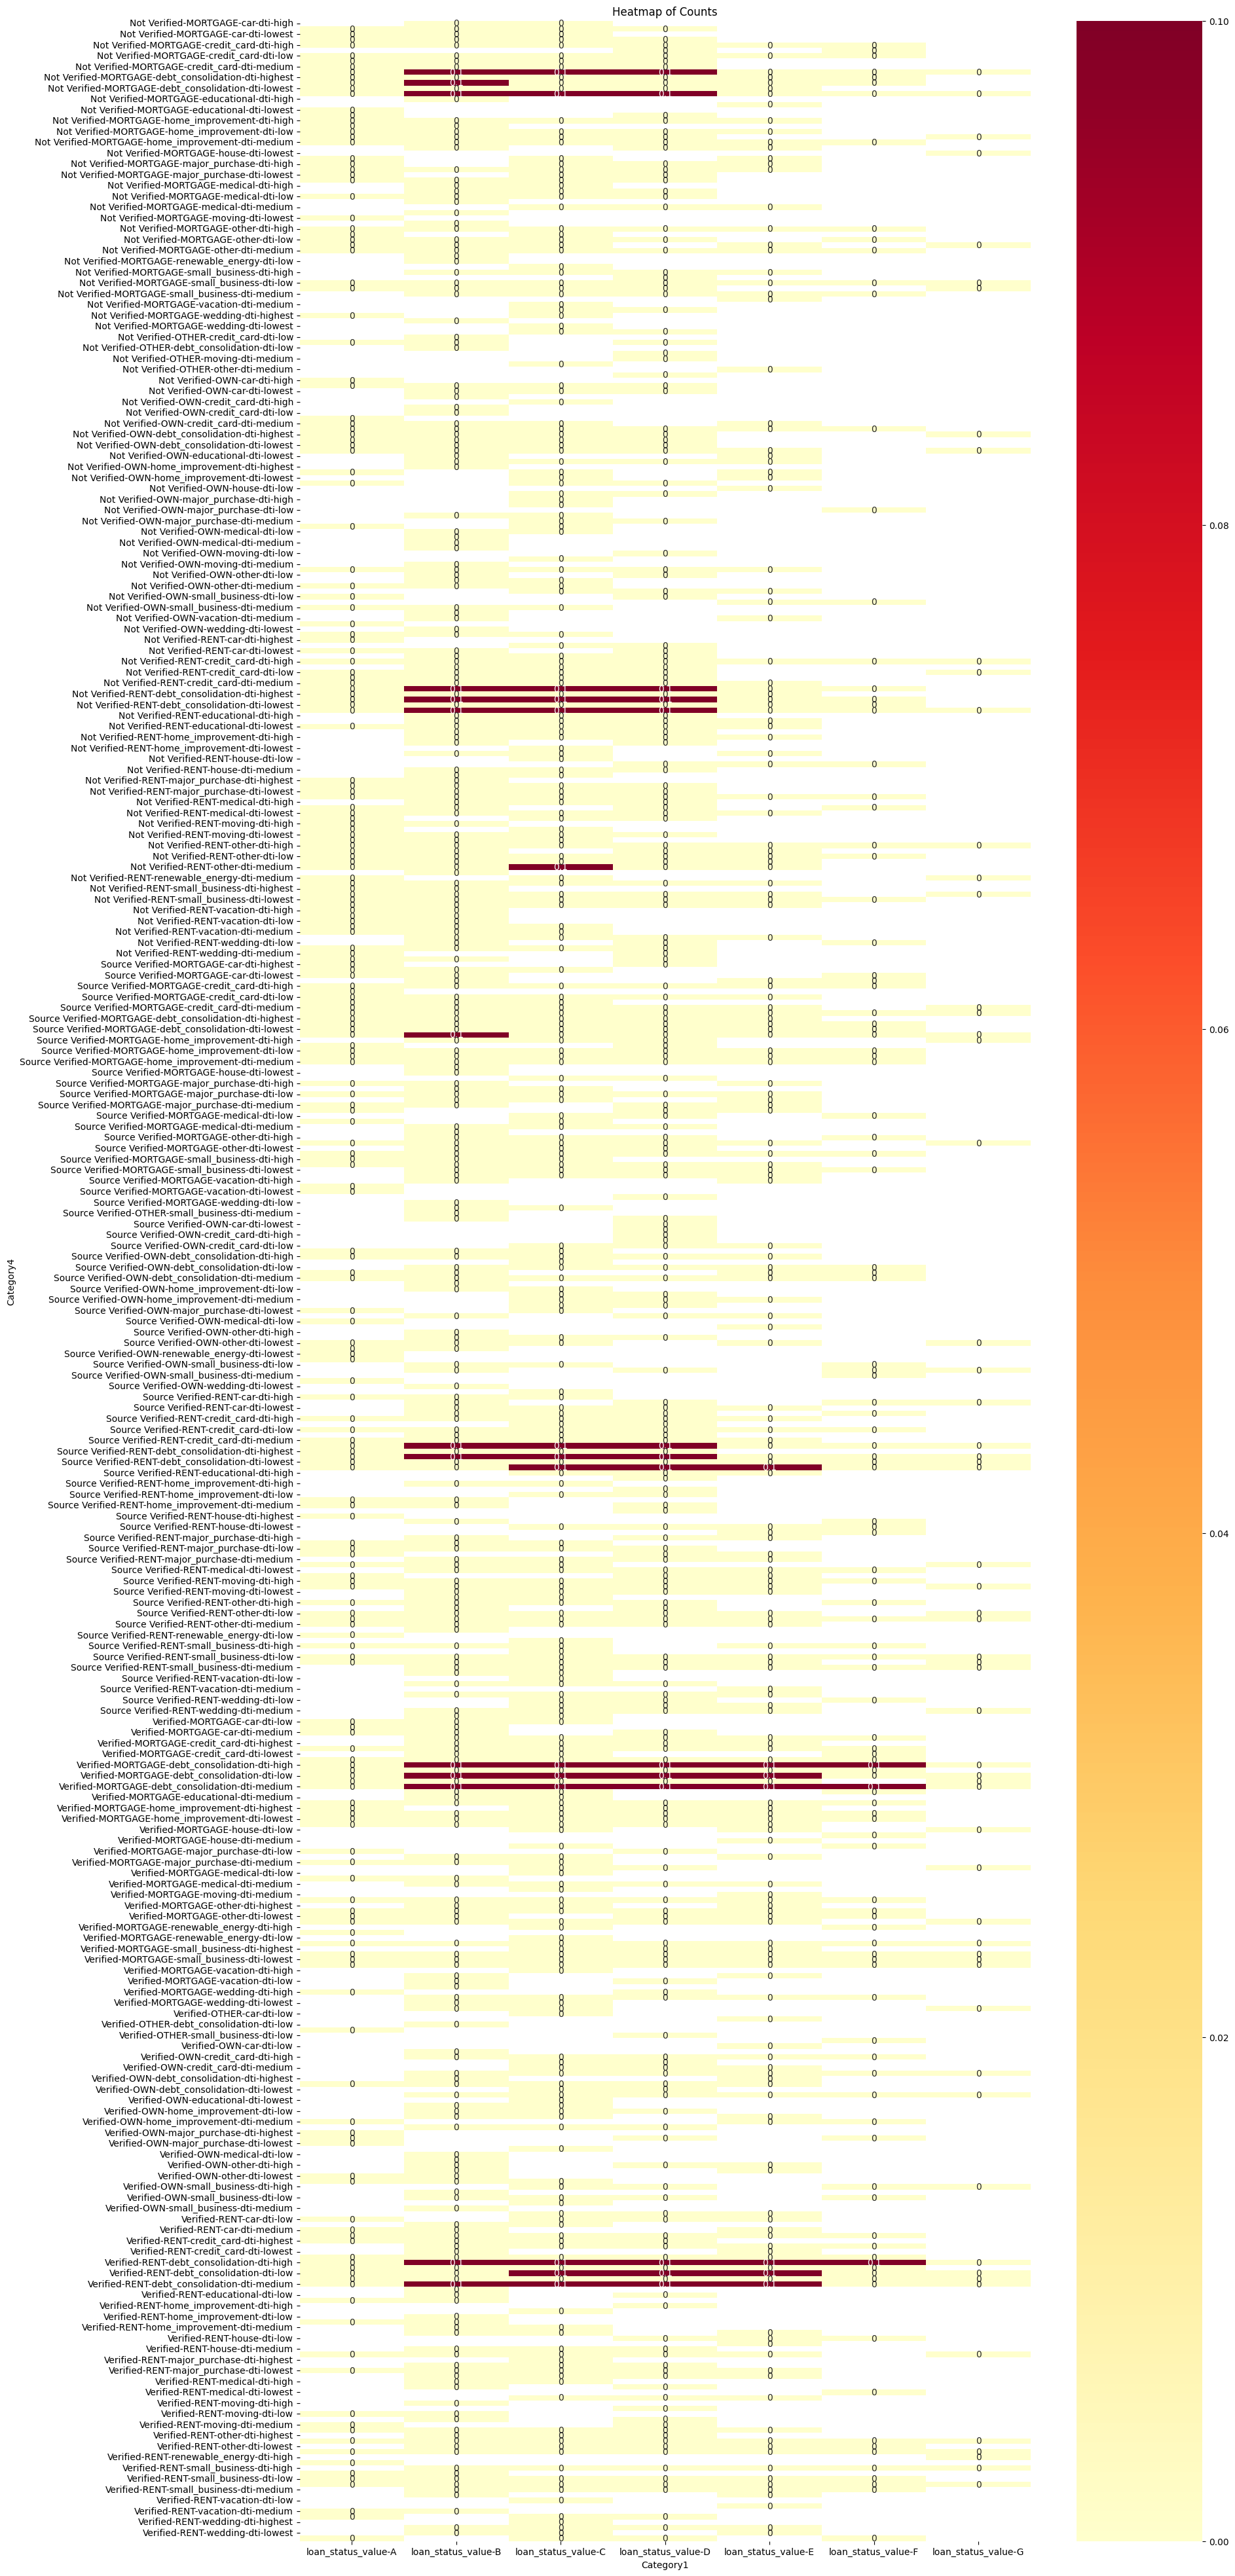

In [54]:

# Create a pivot table with counts
pivot_table = pd.pivot_table(udf1, values='loan_status_value', index=['assgnd_loan_grade', 'incm_src_verification_status', 'home_ownership', 'loan_purpose','dti_label'],
                             aggfunc=lambda x: len(x)/len(udf) * 100)

# Reshape the pivot table for heatmap
heatmap_data = pivot_table.unstack(level='assgnd_loan_grade')

heatmap_data = np.round(heatmap_data, decimals=1)


# Create a heatmap using seaborn
plt.figure(figsize=(18, 50))  # Set the figure size
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlOrRd')

# Set the labels and title
plt.xlabel('Category1')
plt.ylabel('Category4')
plt.title('Heatmap of Counts')

# Display the heatmap
plt.show()
